In [1]:
import pandas as pd
from pycaret.classification import *

In [48]:
# 데이터셋 로드
data = pd.read_csv('dataset/updated_starpoint(대중교통통합)(20240514)2km.csv')

# data = data[data['bld_type']=='HOUSE']

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,longitude,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,127.097912,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,126.903353,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,126.779951,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,126.840071,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,126.780077,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,126.892235,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,126.923358,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,126.923795,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,127.137495,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269


<Axes: >

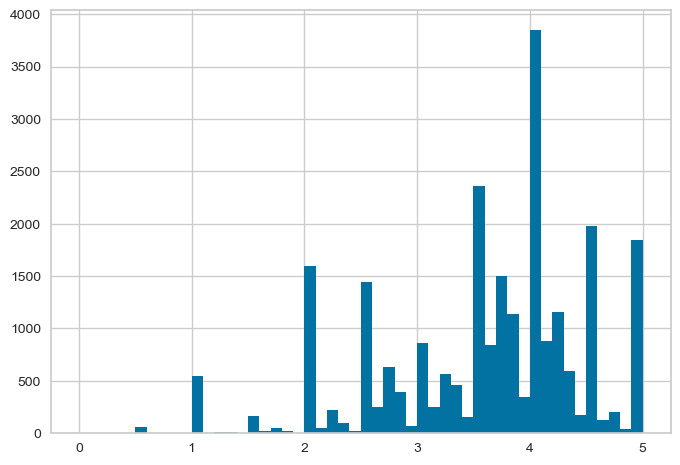

In [3]:
import numpy as np

# 'avg_score'의 최솟값과 최댓값을 기준으로 bins 배열 생성
bins = np.arange(0, data['avg_score'].max() + 0.1, 0.1)

# 히스토그램 그리기
data['avg_score'].hist(bins=bins)

In [49]:
# score 컬럼에 대해 범위 별로 라벨 할당
bins = [0.5, 1.4, 2.3, 3.2, 4.1, 5.0]  # 점수 범위
labels = [0, 1, 2, 3, 4]  # 할당할 라벨
data['label'] = pd.cut(data['avg_score'], bins=bins, labels=labels, include_lowest=True, right=False)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269,2


<Axes: >

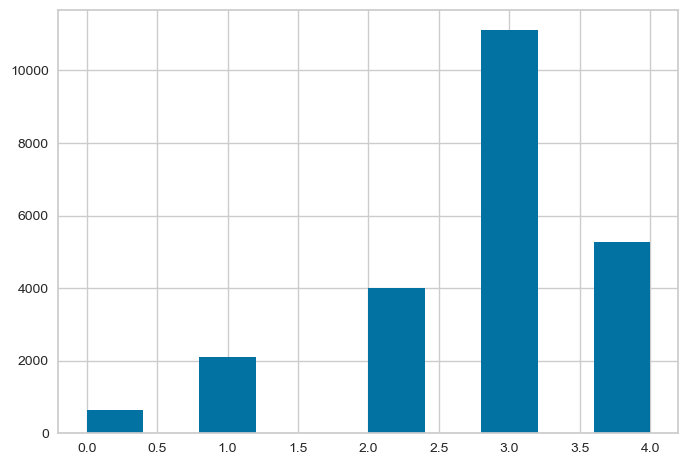

In [50]:
data['label'].hist()

In [51]:
# 머지된 데이터 프레임 결측치 있는 행 제거 및 지정된 컬럼이 0인 값 제거
data.dropna(axis=0,inplace=True)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269,2


In [52]:
# 모든 지정된 컬럼들이 0이 아닌 행만 필터링
filtered_to_use_ai_not_zero = data[(data[['hhld_cnt', 'tot_area', 'bc_rat', 'vl_rat']] != 0).all(axis=1)]

filtered_to_use_ai_not_zero

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,서울특별시 강서구 화곡동 400-51,2.500000,HOUSE,256.10,123.4000,48.180000,701.0300,244.14,13.0,1.0,...,37.538126,0.185,0.050,0.271,0.464,0.170,0.870,0.266,0.022,2
24994,부산광역시 부산진구 전포동 191-689,2.500000,HOUSE,77.94,58.7700,75.400000,235.0600,301.59,8.0,1.0,...,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1


In [53]:
filtered_to_use_ai_not_zero['pkng_cnt_per_hhld_cnt'] = filtered_to_use_ai_not_zero.apply(lambda row: row['tot_pkng_cnt'] / row['hhld_cnt'], axis=1)


In [ ]:

# # 총 주차대수, 세대(가구,호) 컬럼 제거
# ai_df=filtered_to_use_ai_not_zero.drop(['bld_type','longitude','latitude','plat_plc','new_plat_plc','avg_score','tot_pkng_cnt', 'hhld_cnt','main_bld_cnt'], axis=1)

# ai_df

In [54]:
filtered_to_use_ai_not_zero.columns

Index(['plat_plc', 'avg_score', 'bld_type', 'plat_area', 'arch_area', 'bc_rat',
       'tot_area', 'vl_rat', 'hhld_cnt', 'main_bld_cnt', 'tot_pkng_cnt',
       'official_price', 'crime_rank', 'new_plat_plc', 'longitude', 'latitude',
       'nearest_medical_related', 'nearest_academy_related',
       'nearest_laundry_related', 'nearest_market_related',
       'nearest_park_related', 'nearest_library_related',
       'nearest_school_related', 'nearest_transit_related', 'label',
       'pkng_cnt_per_hhld_cnt'],
      dtype='object')

In [55]:
ai_df = filtered_to_use_ai_not_zero[[ 'bc_rat', 'vl_rat', 'crime_rank','official_price','nearest_market_related', 'nearest_library_related','nearest_school_related','nearest_park_related','nearest_laundry_related','nearest_medical_related', 'nearest_transit_related', 'pkng_cnt_per_hhld_cnt','label']]

ai_df

,bc_rat,vl_rat,crime_rank,official_price,nearest_market_related,nearest_library_related,nearest_school_related,nearest_park_related,nearest_laundry_related,nearest_medical_related,nearest_transit_related,pkng_cnt_per_hhld_cnt,label
0,59.760000,475.42,3,11930000.0,0.219,0.354,0.261,0.168,0.043,0.096,0.118,0.650794,3
1,17.435183,273.24,4,1020000.0,0.520,1.150,0.082,0.128,0.152,0.202,0.223,1.241433,3
2,59.170000,149.40,3,1192000.0,0.530,0.929,0.184,0.044,0.400,0.162,0.098,0.187500,4
3,22.760000,170.76,3,3661000.0,0.512,1.393,0.238,0.264,0.350,0.141,0.138,1.217163,4
4,59.920000,163.51,3,1617000.0,0.665,0.771,0.287,0.132,0.260,0.056,0.115,0.250000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,48.180000,244.14,2,5097000.0,0.464,0.870,0.266,0.170,0.271,0.185,0.022,0.461538,2
24994,75.400000,301.59,5,988600.0,0.935,0.854,0.450,0.110,0.187,0.322,0.033,0.000000,2
24996,51.800000,292.12,4,5478000.0,0.040,1.040,0.362,0.317,0.394,0.081,0.077,0.800000,1
24997,57.290000,166.14,3,4033000.0,0.366,1.420,0.220,0.084,0.102,0.218,0.280,1.000000,1


In [ ]:
ai_df['label'].hist()

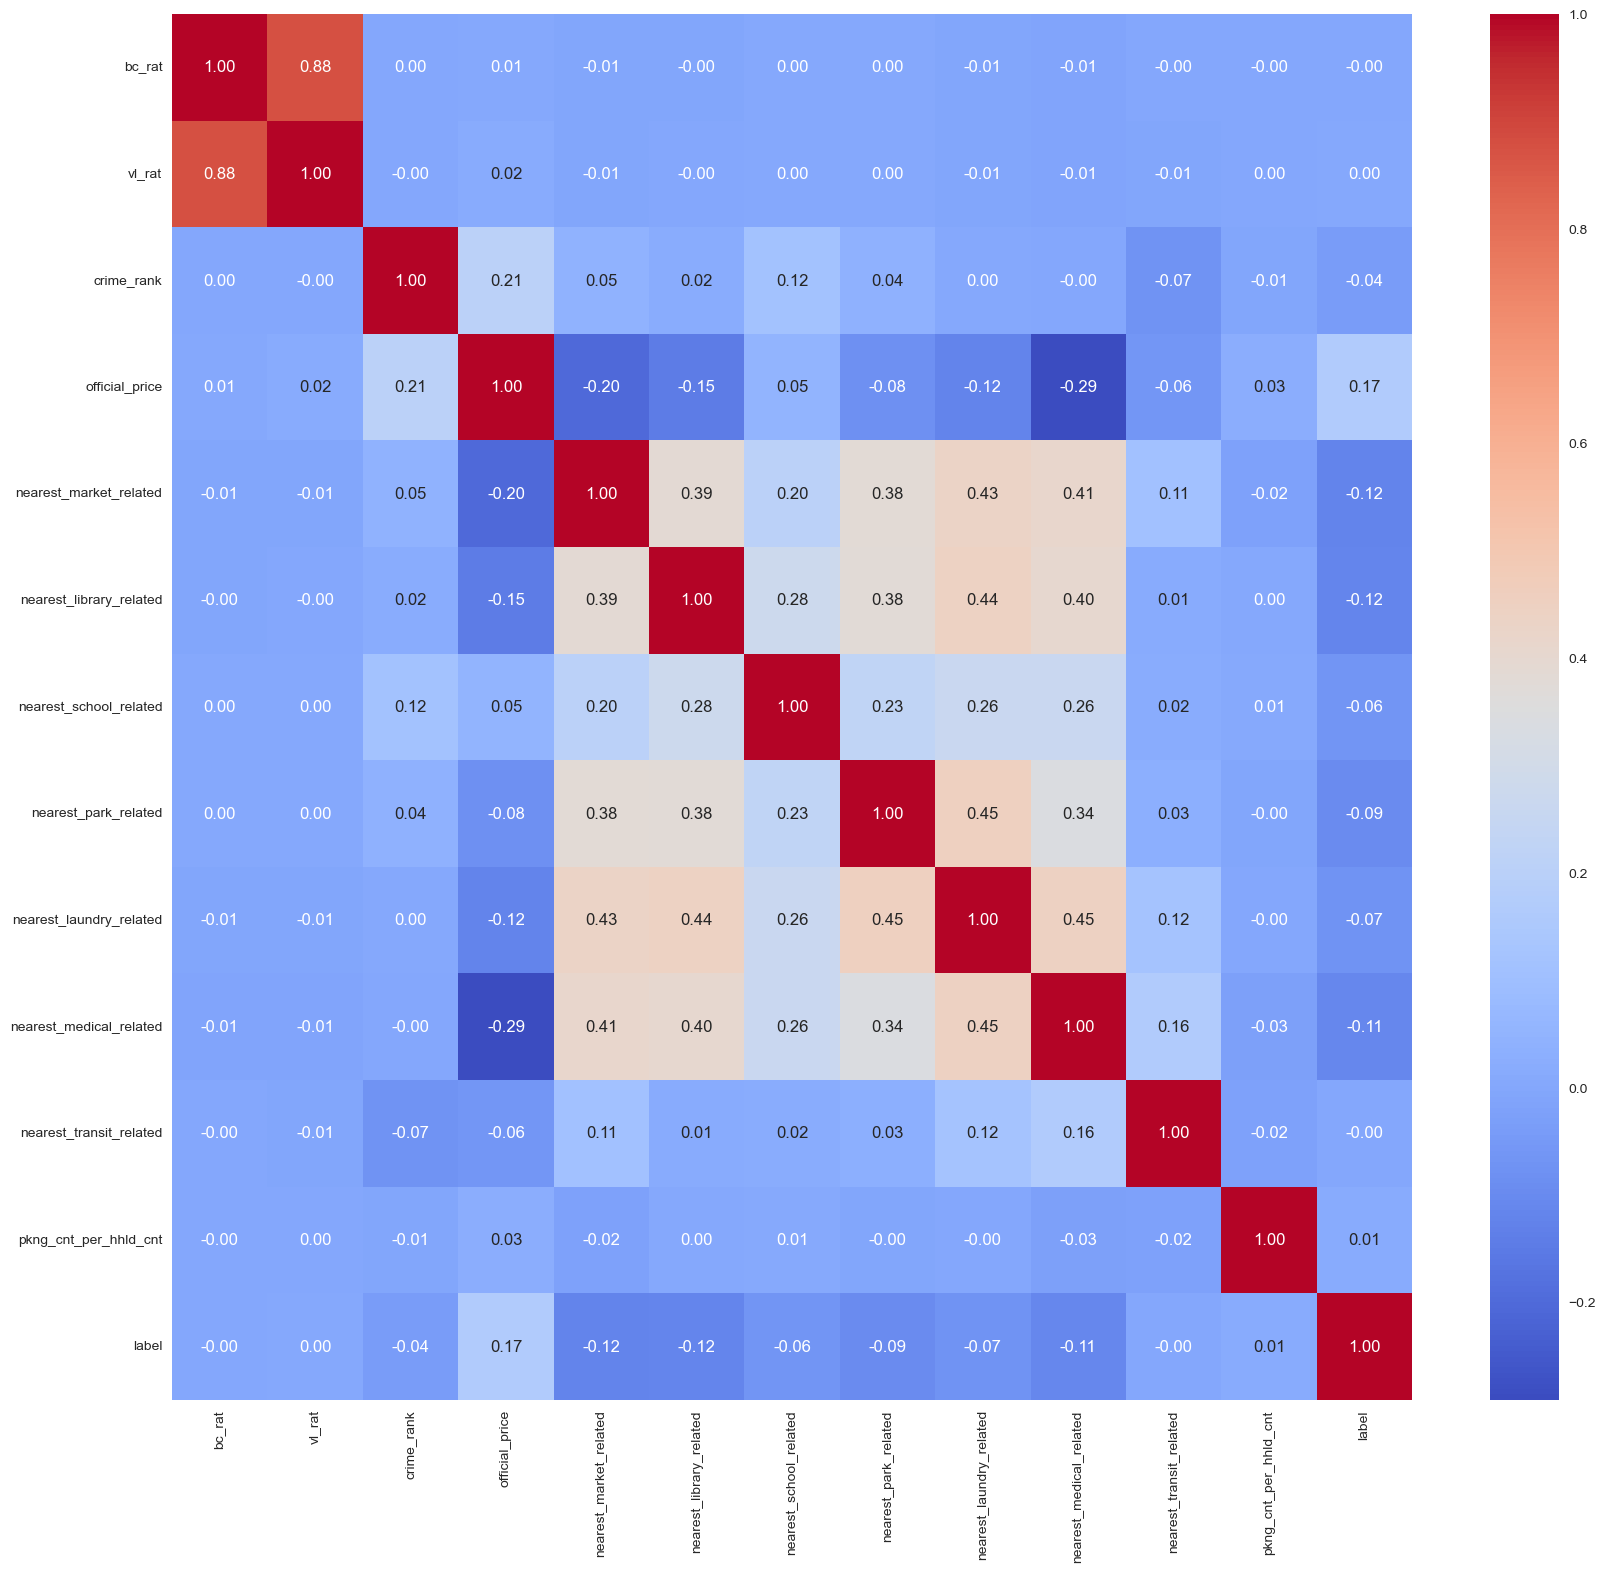

In [56]:
# 레이블과 변수들 간의 상관 계수 계산
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ai_df.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드
X = ai_df.drop(columns=['label'])
y = ai_df['label']

# 훈련 데이터와 테스트 데이터 분할 (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)



In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [59]:
# 교차 검증 실행 (5-fold)
param_grid = {
    'n_neighbors': range(1, 30)
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


In [60]:
from imblearn.over_sampling import SMOTE

# 오버샘플링 진행
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 그리드 검색 실행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy')

In [61]:
print("최적의 n_neighbors:", grid_search.best_params_)
print("최고 평균 정확도:", grid_search.best_score_)

# 최적의 모델을 사용하여 테스트 데이터 평가
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("테스트 세트 정확도:", accuracy_score(y_test, y_pred))


최적의 n_neighbors: {'n_neighbors': 95}
최고 평균 정확도: 0.5019639669505789
테스트 세트 정확도: 0.49557269351613825


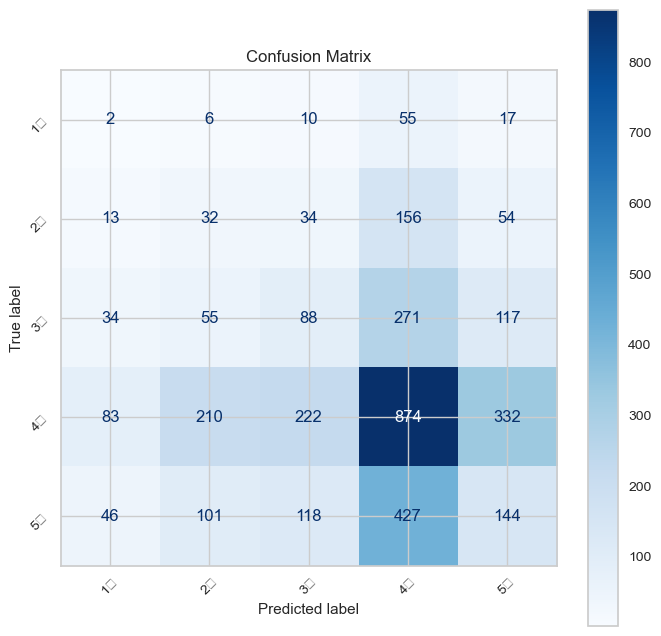

In [51]:
# Confusion Matrix 생성
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
fig, ax = plt.subplots(figsize=(8, 8))  # 크기 조정 가능
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3', '4', '5'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 수정
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1)

# 그리드 탐색 수행
grid_search.fit(X_train_res, y_train_res)

# 최적의 파라미터와 그 때의 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# 튜닝된 모델로 예측
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)

# 새로운 평가
new_accuracy = accuracy_score(y_test, y_pred)
new_auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("New Accuracy: {:.2f}%".format(new_accuracy * 100))
print("New AUC Score: {:.2f}".format(new_auc_score))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.54
New Accuracy: 43.42%
New AUC Score: 0.66


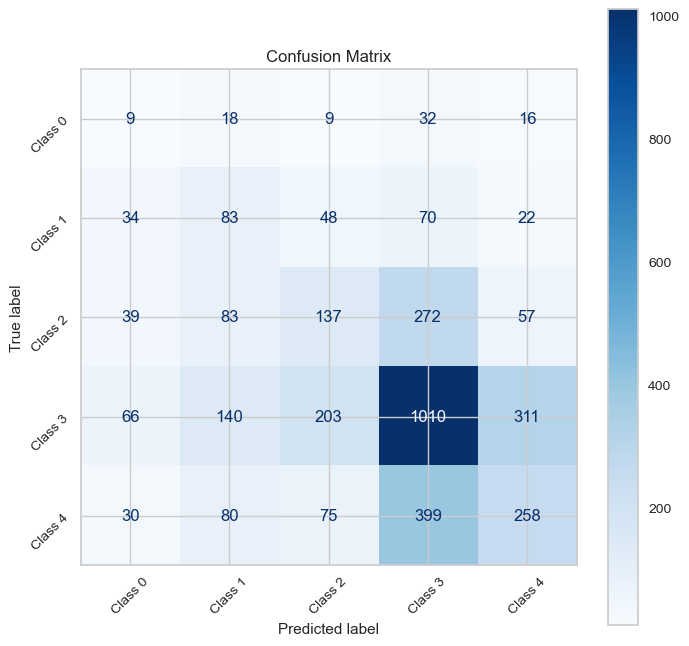

In [17]:
# Confusion Matrix 생성
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
fig, ax = plt.subplots(figsize=(8, 8))  # 크기 조정 가능
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()